In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-11-20 16:17:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.13’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.01s   

2025-11-20 16:17:42 (84.1 MB/s) - ‘car_fuel_efficiency.csv.13’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [6]:
df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

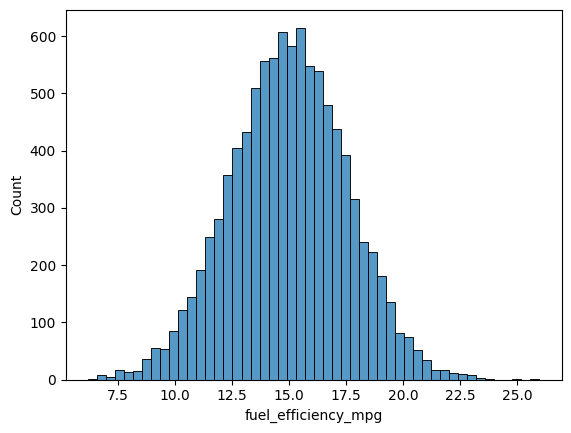

In [7]:
sns.histplot(df['fuel_efficiency_mpg'], bins = 50)

In [8]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [9]:
df.loc[:,df.isnull().sum()!=0]

,num_cylinders,horsepower,acceleration,num_doors
0,3.0,159.0,17.7,0.0
1,5.0,97.0,17.8,0.0
2,NaN,78.0,15.1,0.0
3,4.0,NaN,20.2,2.0
4,1.0,140.0,14.4,2.0
...,...,...,...,...
9699,5.0,164.0,17.3,NaN
9700,NaN,154.0,15.0,0.0
9701,2.0,138.0,15.1,-1.0
9702,4.0,177.0,19.4,1.0


In [10]:
df.loc[:,df.isnull().sum()!=0].columns

Index(['num_cylinders', 'horsepower', 'acceleration', 'num_doors'], dtype='object')

In [11]:
list(df.loc[:,df.isnull().sum()!=0].columns)

['num_cylinders', 'horsepower', 'acceleration', 'num_doors']

In [12]:
cols_missing_vals = list(df.loc[:,df.isnull().sum()!=0].columns)

In [13]:
df.horsepower.median()

np.float64(149.0)

In [14]:
# get size of df
n = len(df)
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

In [15]:
# get size of df
n

9704

In [16]:
# get size of df
n_val

1940

In [17]:
# get size of df
n_test 

1940

In [18]:
n_train 

5824

In [19]:
idx = np.arange(n)

In [20]:
np.random.seed(42)
np.random.shuffle(idx)

In [21]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [22]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train = df.iloc[idx[n_val+n_test:]]

In [23]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [24]:
# we neeed to do log plus one transformation with our y
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [25]:
# we neeed delete this from our table as we may accidentally let the table "see" it
# in past often target variable ended up in df and the model was amazingly perfect.
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [26]:
# base = df.loc[:,df.dtypes == 'int64'] #this is problematic because it is naive to floats 
# base = list(df.select_dtypes(include=['number']).columns.values)
# base

In [27]:
# df_rum = df[base].copy()
# for c in base:       
#         df_rum[c] = df_rum[c].fillna(df_rum[c].mean()) #step 2 fill it will zeros
# df_rum.isnull().sum()

In [28]:
def prepare_X(df):
    base = list(df.select_dtypes(include=['number']).columns.values)
    df = df.copy() #we copy then modify...
    features = base.copy() #this is the replacement of plus notation with safe copy 
    df['age'] = 2017 - df.model_year
    features.append('age')
    df_num = df[features].copy() #step 1 select numerical kolous
    df_num = df_num.fillna(0) #step 2 fill it will zeros
    X = df_num.values #step 3 extract numpee arreh
    return X

In [29]:
df['horsepower'].mean()

np.float64(149.65729212983547)

In [30]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
def prepare_X_mean(df):
    base = list(df.select_dtypes(include=['number']).columns.values)
    df = df.copy() #we copy then modify...
    features = base.copy() #this is the replacement of plus notation with safe copy 
    df['age'] = 2017 - df.model_year
    features.append('age')
    df_num = df[features].copy()  #step 1 select numerical kolous
    for c in features:        
        df_num[c] = df_num[c].fillna(df_num[c].mean()) #step 2 fill it will zeros
    X = df_num.values #step 3 extract numpee arreh
    return X

In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]    

In [35]:
#Train
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

#val
X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred )

np.float64(26.174465342276992)

In [36]:
#Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred )

np.float64(1.9709872258912888)